# Make Plots for Paper

This jupyter notebook generates the plots seen in the paper using data generated by generate_data_for_paper.ipynb. Refer to the guide for more details on the tool itself. 

In [19]:
from make_plot import plot_main
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PhenomD_import import PhenomDWaveforms
import scipy.constants as ct

Msun = 1.989e30

## Figure 1: Sensitivity Curves

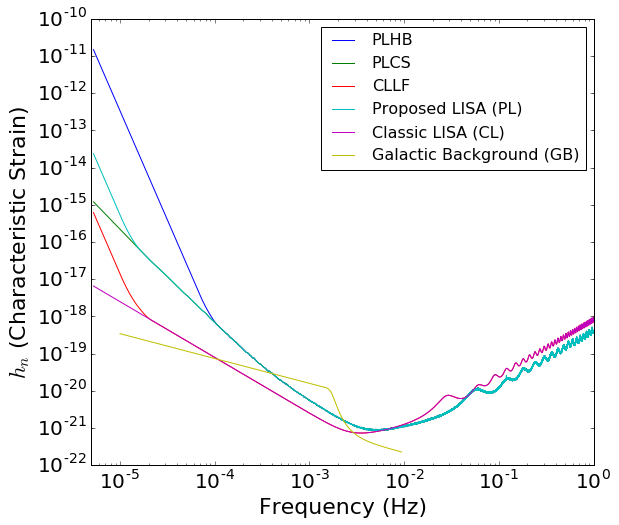

In [20]:
fig = plt.figure()
fig.set_size_inches(9,8)
for name in ['PLHB', 'PLCS', 'CLLF', 'PL', 'CL', 'WDnoise']:
    noise_data = np.genfromtxt('noise_curves/' + name + '.txt', names=True)
    f = noise_data['f']
    ASD = noise_data['ASD']
    hn = np.sqrt(f)*ASD
    
    if name == 'PL':
        name = 'Proposed LISA (PL)'
    if name == 'CL':
        name = 'Classic LISA (CL)'
    if name == 'WDnoise':
        name = 'Galactic Background (GB)'
    plt.loglog(f, hn, label = name)

plt.xlim(5e-6,1e0)
plt.ylim(1e-22, 1e-10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r'$h_n$ (Characteristic Strain)', fontsize=22)
plt.xlabel('Frequency (Hz)', fontsize=22)
plt.legend(loc='upper right', prop={'size':16})
fig.savefig('Sensitivity_curves.pdf', dpi=250)

## Figure 2: Waveform Example

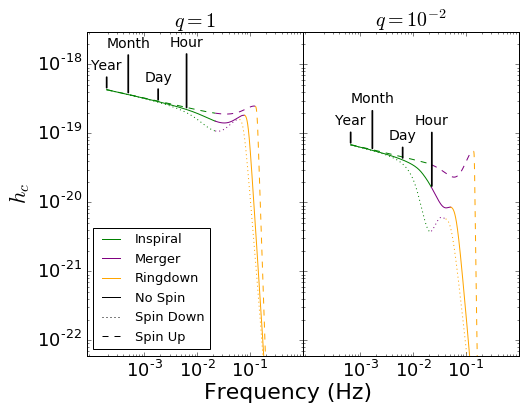

In [21]:
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
fig1.set_size_inches(8,6)
plt.subplots_adjust(wspace=0.0, left=0.15, bottom=0.15)

M = 1e5
z = 1.0
start_time = 1.0
end_time = 0.0
ax1.set_title(r'$q=1$', fontsize=20)
ax2.set_title(r'$q=10^{-2}$', fontsize=20)
for q, ax in [[1, ax1], [1/100,ax2]]:
    ax.set_ylim(6e-23, 3e-18)
    ax.set_xlim(8e-5, 1e0)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    
    for s, ls in [[-1.0, 'dotted'], [0.0, 'solid'], [1.0,'dashed']]:
        m1 = M/(1+q)
        m2 = M*q/(1+q)
        wave = PhenomDWaveforms(m1, m2, s, s, z, start_time, end_time, num_points=4096)
        wave.create_waveforms()
        
        f = wave.freqs
        hc = wave.amplitude*np.sqrt(96/200) #averaging factor see Cornish and Robson 2018
        
        ins = np.where(f<wave.fmrg)[0]
        mrg = np.where((f>=wave.fmrg)&(f<=wave.fpeak))[0]
        rd = np.where(f>wave.fpeak)[0]
        
        ax.loglog(f[ins], hc[ins], color='green', ls = ls)
        ax.loglog(f[mrg], hc[mrg], color='purple', ls = ls)
        ax.loglog(f[rd], hc[rd], color='orange', ls = ls)
        if s == 0.0:
            N = m1*m2/(m1+m2)**2.
            start_times = np.array([1.0,1.0/12.0, 1.0/365.25,1.0/(365.25*24.0)])*ct.Julian_year/(1+z)

            tau = N*(start_times*ct.c)/(5.*(m1+m2)*Msun*ct.G/(ct.c**2.))
            flow = 1./(8.*ct.pi*(m1+m2)*Msun*ct.G/(ct.c**2.)*tau**(3./8.))*(1.+((11./32)*N+743./2688.)*tau**(-1./4.))*ct.c/(1+z)

            f_1y_ind = np.where(f >= flow[0])[0][0]
            f_1m_ind = np.where(f >= flow[1])[0][0]
            f_1d_ind = np.where(f >= flow[2])[0][0]
            f_1h_ind = np.where(f >= flow[3])[0][0]

            ax.annotate("Year",xy=(f[f_1y_ind], hc[f_1y_ind]), xycoords='data',xytext=(0, 20), ha='center', textcoords='offset points',arrowprops=dict(arrowstyle="-",linewidth = 1.75), fontsize=14)
            ax.annotate("Month",xy=(f[f_1m_ind], hc[f_1m_ind]), xycoords='data',xytext=(0.0, 47), ha='center', textcoords='offset points',arrowprops=dict(arrowstyle="-",linewidth = 1.75), fontsize=14)
            ax.annotate("Day",xy=(f[f_1d_ind], hc[f_1d_ind]), xycoords='data',xytext=(0.0, 20), ha='center', textcoords='offset points',arrowprops=dict(arrowstyle="-",linewidth = 1.75), fontsize=14)
            ax.annotate("Hour",xy=(f[f_1h_ind], hc[f_1h_ind]), xycoords='data',xytext=(0.0, +63), ha='center', textcoords='offset points',arrowprops=dict(arrowstyle="-",linewidth = 1.75), fontsize=14)

ax1.plot(1,1, color='green', ls='solid', label='Inspiral')
ax1.plot(1,1, color='purple', ls='solid', label='Merger')
ax1.plot(1,1, color='orange', ls='solid', label='Ringdown')
ax1.plot(1,1, color='black', ls='solid', label='No Spin')
ax1.plot(1,1, color='black', ls='dotted', label='Spin Down')
ax1.plot(1,1, color='black', ls='dashed', label='Spin Up')
ax1.legend(loc='lower left', prop={'size':13})
ax1.set_ylabel(r'$h_c$', fontsize = 22)
ax1.set_xticks([1e-3, 1e-2, 1e-1])

fig1.text(0.5, 0.05, 'Frequency (Hz)', ha = 'center', fontsize=22)
fig1.savefig('Phase_tracks1.pdf', dpi=250)

## Figure 3: $h_c$ vs. $h_n$

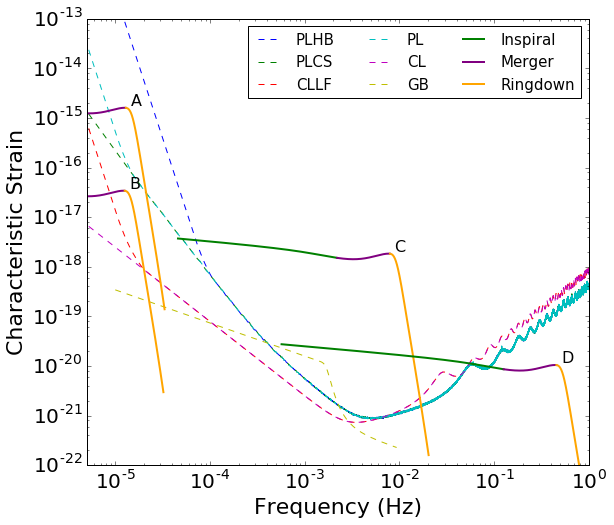

In [22]:
fig2 = plt.figure()
fig2.set_size_inches(9,8)
for name in ['PLHB', 'PLCS', 'CLLF', 'PL', 'CL', 'WDnoise']:
    noise_data = np.genfromtxt('noise_curves/' + name + '.txt', names=True)
    f = noise_data['f']
    ASD = noise_data['ASD']
    hn = np.sqrt(f)*ASD
    if name == 'WDnoise':
        name = 'GB'
    plt.loglog(f, hn, label = name, ls='dashed')
    
q = 1.0
s = 0.0
start_time = 1.0
end_time = 0.0
for M, z, letter in [[7e8, .75, 'A'],[6e7,20.0, 'B'], [1e6, 1.0, 'C'], [1e4, 2.5, 'D']]:
    m1 = M/(1+q)
    m2 = M*q/(1+q)
    wave = PhenomDWaveforms(m1, m2, s, s, z, start_time, end_time, num_points=4096)
    wave.create_waveforms()

    f = wave.freqs
    hc = wave.amplitude*np.sqrt(96/200) #averaging factor see Cornish and Robson 2018

    ins = np.where(f<wave.fmrg)[0]
    mrg = np.where((f>=wave.fmrg)&(f<=wave.fpeak))[0]
    rd = np.where(f>wave.fpeak)[0]

    plt.loglog(f[ins], hc[ins], color='green', lw=2)
    plt.loglog(f[mrg], hc[mrg], color='purple', lw=2)
    plt.loglog(f[rd], hc[rd], color='orange', lw=2)
    
    plt.text(f[rd][0]*1.12, hc[rd][0]*1.12, letter, fontdict={'fontsize':16})

plt.plot(1,1, color='green', lw=2, label='Inspiral')
plt.plot(1,1, color='purple', lw=2, label='Merger')
plt.plot(1,1, color='orange', lw=2, label='Ringdown')

plt.xlim(5e-6,1e0)
plt.ylim(1e-22, 1e-13)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r'Characteristic Strain', fontsize=22)
plt.xlabel('Frequency (Hz)', fontsize=22)
plt.legend(loc='upper right', ncol = 3, prop={'size':15})
fig2.savefig('Phase_tracks2.pdf', dpi=250)

## Figure 4: Main Comparison

In [23]:
figure_4_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "show_figure": True,

    "save_figure": True,
    "dpi": 400,
    "output_path": "main_comp.pdf",
        
    "file_name": "q5_s65.hdf5",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 10.0,
    "spacing": "tight",
    "fig_y_label": "Redshift",
    "fig_x_label": r"Source Frame Total Mass ($M_\odot$)",
        
    "tick_label_fontsize":16,

    "num_rows": 5,
    "num_cols": 2,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    "colorbars":
        {"Waterfall":{"pos":3, "ticks_fontsize":14}, "Ratio":{"pos":5}}
    },



"plot_info":
    {

    "0":{
        "file":[
            {
             "label":"LISA_prop_curve_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL"}
        },
        
    "1":{
        "indices": [0, 2, 4, 6, 8],
        "type": "Horizon",
        "legend":
            {
            "labels": ["PL", "CL", "PLHB", "PLCS", "CLLF"],
            "bbox_to_anchor": [0.17, 1.7],
            "size":10,
            "ncol": 3
            }
        },
        
    "2":{
        "file":[
            {"label":"Classic_LISA_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL"}
        },
    "3":{
        "indices": 2,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "4":{
        "file":[
            {"label":"LISA_prop_curve_early_break_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PLHB"}
        },
    "5":{
        "indices": 4,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "6":{
        "file":[
            {"label":"LISA_prop_curve_less_steep_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PLCS"}
        },
    "7":{
        "indices": 6,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "8":{
        "file":[
            {"label":"Classic_LISA_prop_behavior_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CLLF"}
        },
    "9":{
        "indices": 8,
        "control":
            {"index": 0},
        "type": "Ratio",
        }
    }
}




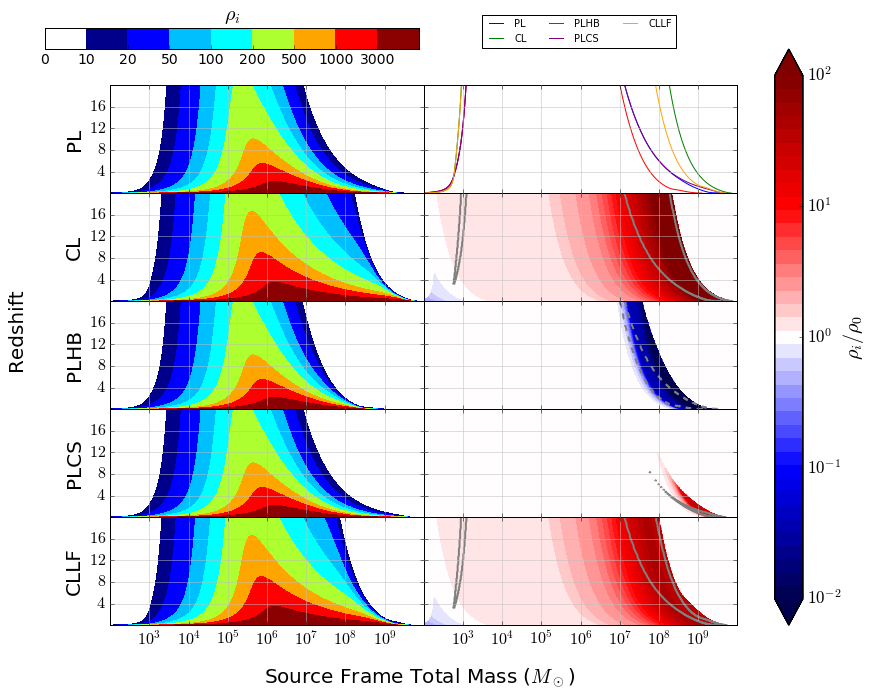

In [24]:
plot_main(figure_4_dict)

## Figure 5: Main Comparison with Galactic Background Noise

In [25]:
#add wd to labels for figure 4 to create figure 5
figure_5_dict = figure_4_dict.copy()
for i in [0,2,4,6,8]:
    figure_5_dict['plot_info'][str(i)]['file'][0]['label'] = figure_5_dict['plot_info'][str(i)]['file'][0]['label'][0:-3] + 'wd_all' 
    
figure_5_dict['general']['output_path'] = 'main_comp_wd.pdf'

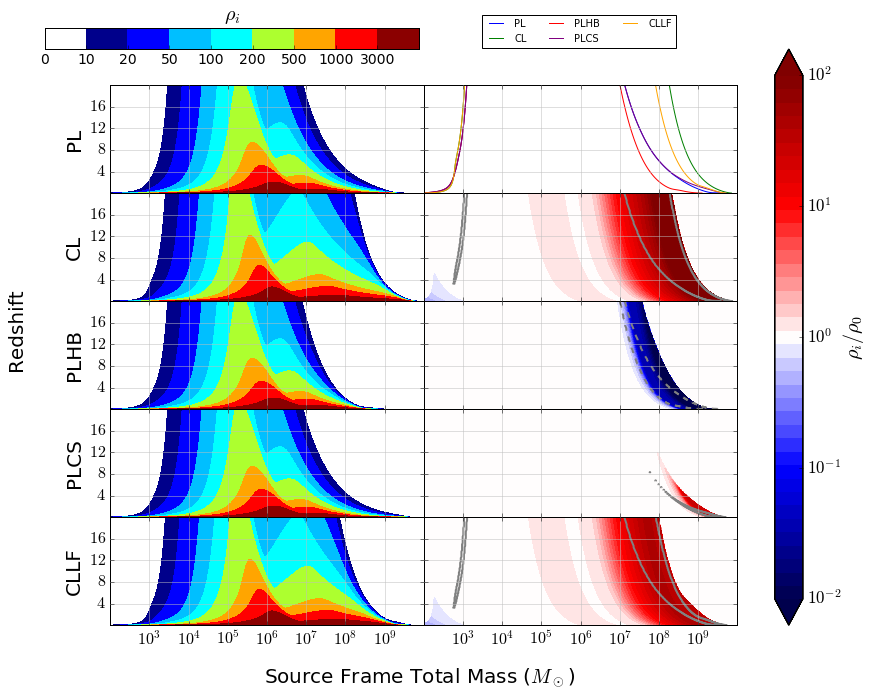

In [26]:
plot_main(figure_5_dict)

## Figure 6

In [27]:
figure_6_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "show_figure": True,

    "save_figure": True,
    "output_path": "phase_comp_wd.pdf",
        
    "file_name": "q5_s65.hdf5",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 10.0,
    "spacing": "tight",
    "fig_y_label": "Redshift",
    "fig_x_label": r"Source Frame Total Mass ($M_\odot$)",
        
    "tick_label_fontsize":16,

    "num_rows": 6,
    "num_cols": 2,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
        
    "colorbars":
        {"Waterfall":{"pos":3, "ticks_fontsize":14}, "Ratio":{"pos":5}}
    },



"plot_info":
    {

    "0":{
        "file":[
            {
             "label":"LISA_prop_curve_wd_ins"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL\nINS","ylabel_fontsize":13}
        },
        
    "1":{
        "indices": [0, 2],
        "type": "Horizon",
        "legend":
            {
            "labels": ["PL", "CL"],
            "bbox_to_anchor": [0.32, 1.7],
            "size":10,
            "ncol": 2
            },
        "extra":
            {
            "snr_contour_value":100
            }
        },
        
    "2":{
        "file":[
            {"label":"Classic_LISA_wd_ins"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL\nINS","ylabel_fontsize":13}
        },
    "3":{
        "indices": 2,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "4":{
        "file":[
            {"label":"LISA_prop_curve_wd_mrg"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL\nMRG","ylabel_fontsize":13}
        },
    "5":{
        "indices": [4, 6],
        "type": "Horizon",
        "extra":
            {
            "snr_contour_value":100
            }
        },
    "6":{
        "file":[
            {"label":"Classic_LISA_wd_mrg"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL\nMRG","ylabel_fontsize":13}
        },
    "7":{
        "indices": 6,
        "control":
            {"index": 4},
        "type": "Ratio",
        },
    "8":{
        "file":[
            {"label":"LISA_prop_curve_wd_rd"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL\nRD","ylabel_fontsize":13},
        "extra":
            {'snr_contour_value': 21.221441}
        },
    "9":{
        "indices": [8, 10],
        "type": "Horizon",
        "extra":
            {
            "snr_contour_value":100
            }
        },
    "10":{
        "file":[
            {"label":"Classic_LISA_wd_rd"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL\nRD","ylabel_fontsize":13},
        "extra":
            {'snr_contour_value': 21.221441}
        },
    "11":{
        "indices": 10,
        "control":
            {"index": 8},
        "type": "Ratio",
        },
    }
}

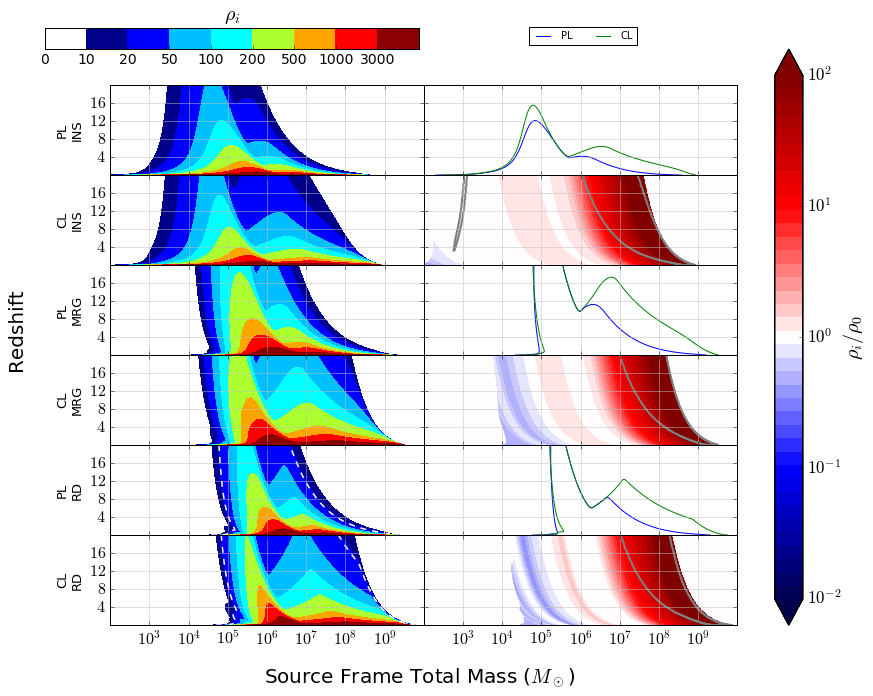

In [28]:
plot_main(figure_6_dict)

## Figure 7

In [43]:
figure_7_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "show_figure": True,

    "save_figure": True,
    "output_path": "ratio_comp_wd.pdf",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 10.0,
    "spacing": "tight",
    "fig_y_label": "Redshift",
    "fig_x_label": r"Source Frame Total Mass ($M_\odot$)",
        
    "tick_label_fontsize":16,

    "num_rows": 6,
    "num_cols": 2,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    "colorbars":
        {"Waterfall":{"pos":3, "ticks_fontsize":14}, "Ratio":{"pos":5}}
    },



"plot_info":
    {

    "0":{
        "file":[
            {"name":"q5_s65.hdf5",
             "label":"LISA_prop_curve_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL\nq=5","ylabel_fontsize":16}
        },
        
    "1":{
        "indices": [0, 2],
        "type": "Horizon",
        "legend":
            {
            "labels": ["PL", "CL"],
            "bbox_to_anchor": [0.32, 1.7],
            "size":10,
            "ncol": 2
            },
        "extra":
            {
            "snr_contour_value":100
            }
        },
        
    "2":{
        "file":[
            {"name":"q5_s65.hdf5",
             "label":"Classic_LISA_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL\nq=5","ylabel_fontsize":16}
        },
    "3":{
        "indices": 2,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "4":{
        "file":[
            {"name":"q50_s65.hdf5", "label":"LISA_prop_curve_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL\nq=50","ylabel_fontsize":16}
        },
    "5":{
        "indices": [4, 6],
        "type": "Horizon",
        "extra":
            {
            "snr_contour_value":100
            }
        },
    "6":{
        "file":[
            {"name":"q50_s65.hdf5", "label":"Classic_LISA_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL\nq=50","ylabel_fontsize":16}
        },
    "7":{
        "indices": 6,
        "control":
            {"index": 4},
        "type": "Ratio",
        },
    "8":{
        "file":[
            {"name":"q500_s65.hdf5", "label":"LISA_prop_curve_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL\nq=500","ylabel_fontsize":16},
        },
    "9":{
        "indices": [8, 10],
        "type": "Horizon",
        "extra":
            {
            "snr_contour_value":100
            }
        },
    "10":{
        "file":[
            {"name":"q500_s65.hdf5", "label":"Classic_LISA_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL\nq=500","ylabel_fontsize":16},
        },
    "11":{
        "indices": 10,
        "control":
            {"index": 8},
        "type": "Ratio",
        },
    }
}

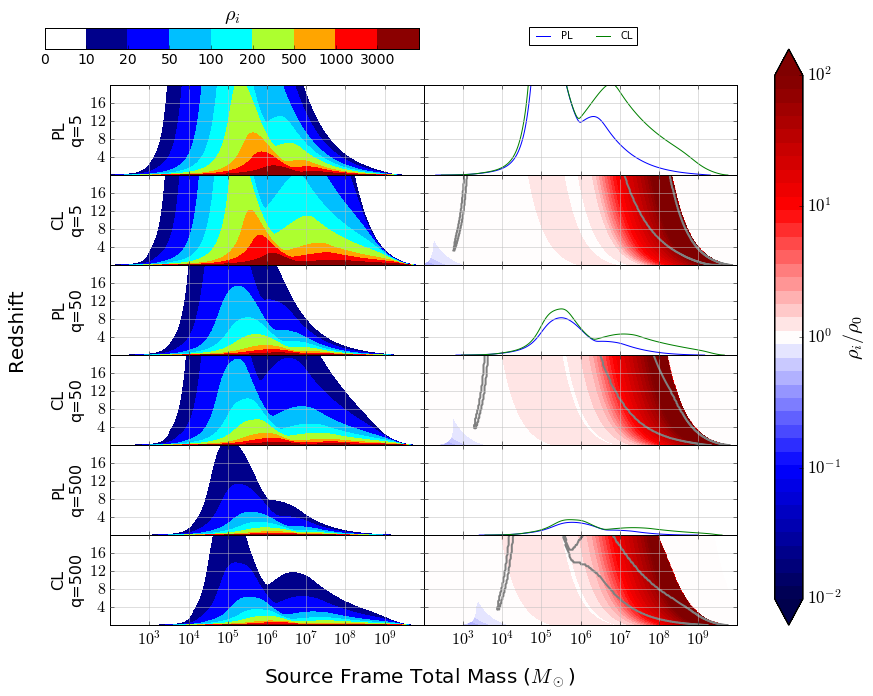

In [44]:
plot_main(figure_7_dict)

## Figure 8

In [47]:
figure_8_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "show_figure": True,

    "save_figure": True,
    "output_path": "spin_comp_wd.pdf",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 10.0,
    "spacing": "tight",
    "fig_y_label": "Redshift",
    "fig_x_label": r"Source Frame Total Mass ($M_\odot$)",
        
    "tick_label_fontsize":16,

    "num_rows": 6,
    "num_cols": 2,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    "colorbars":
        {"Waterfall":{"pos":3, "ticks_fontsize":14}, "Ratio":{"pos":5}}
    },



"plot_info":
    {

    "0":{
        "file":[
            {"name":"q500_s99.hdf5",
             "label":"LISA_prop_curve_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL\nS=0.99","ylabel_fontsize":16}
        },
        
    "1":{
        "indices": [0, 2],
        "type": "Horizon",
        "legend":
            {
            "labels": ["PL", "CL"],
            "bbox_to_anchor": [0.32, 1.7],
            "size":10,
            "ncol": 2
            },
        "extra":
            {
            "snr_contour_value":100
            }
        },
        
    "2":{
        "file":[
            {"name":"q500_s99.hdf5",
             "label":"Classic_LISA_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL\nS=0.99","ylabel_fontsize":16}
        },
    "3":{
        "indices": 2,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "4":{
        "file":[
            {"name":"q500_s0.hdf5", "label":"LISA_prop_curve_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL\nS=0.0","ylabel_fontsize":16}
        },
    "5":{
        "indices": [4, 6],
        "type": "Horizon",
        "extra":
            {
            "snr_contour_value":100
            }
        },
    "6":{
        "file":[
            {"name":"q500_s0.hdf5", "label":"Classic_LISA_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL\nS=0.0","ylabel_fontsize":16}
        },
    "7":{
        "indices": 6,
        "control":
            {"index": 4},
        "type": "Ratio",
        },
    "8":{
        "file":[
            {"name":"q500_sn99.hdf5", "label":"LISA_prop_curve_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL\nS=-0.99","ylabel_fontsize":16},
        },
    "9":{
        "indices": [8, 10],
        "type": "Horizon",
        "extra":
            {
            "snr_contour_value":100
            }
        },
    "10":{
        "file":[
            {"name":"q500_sn99.hdf5", "label":"Classic_LISA_wd_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL\nS=-0.99","ylabel_fontsize":16},
        },
    "11":{
        "indices": 10,
        "control":
            {"index": 8},
        "type": "Ratio",
        },
    }
}

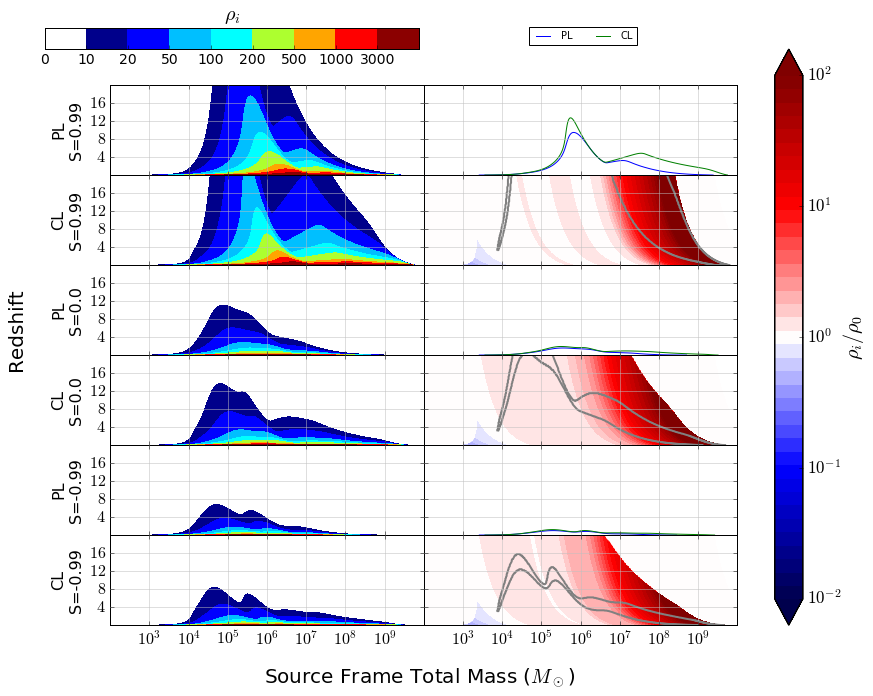

In [48]:
plot_main(figure_8_dict)

# Figure 9

In [33]:
    figure_9_dict = {
    "general":{
        "WORKING_DIRECTORY": "paper_data",

        "SNR_CUT": 5.0,

        "show_figure": False,

        "save_figure": False,
        "output_path": "gridded_sense_curves.pdf",

        "file_name": "M8_z5.hdf5",

        "x_column_label": "q",
        "y_column_label": "s", 

        "figure_width": 13.0,
        "figure_height": 10.0,
        "spacing": "tight",
        "adjust_figure_bottom": 0.15,
        "fig_y_label": "Spin",
        "fig_x_label": "Mass Ratio",

        "tick_label_fontsize":16,
        
        "num_rows": 3,
        "num_cols": 3,

        "xlims": [-4.0, 0.0],
        "dx": 1.0,
        "xscale": "log",
        "reverse_x_axis":True,
            
        "ylims": [-1.0, 1.0],
        "dy": 0.5,
        "yscale": "lin",
        "colorbars":
            {"Ratio":{"label":r"$\rho_1/\rho_2$"}}
        },



    "plot_info":
        {
        #set diagonals
        "0":{
            "file":[
                {"label":"LISA_prop_curve_all"}
                ],
            "type": "Waterfall",
            "label":
                {"ylabel": "PL"}
            },

        "4":{
            "file":[
                {"label":"Classic_LISA_all"}
                ],
            "type": "Waterfall",
            },
        "8":{
            "file":[
                {"label":"Classic_LISA_prop_behavior_all"}
                ],
            "type": "Waterfall",
            "label":
                {"xlabel": "CLLF"}
            },
        #set upper diagonals - ratio
        "1":{
            "indices": 4,
            "control":
                {"index": 0},
            "type": "Ratio",
            "extra":
                {"show_loss_gain":True}
            },
        "2":{
            "indices": 8,
            "control":
                {"index": 0},
            "type": "Ratio",
            "extra":
                {"show_loss_gain":True}
            },
        "5":{
            "indices": 8,
            "control":
                {"index": 4},
            "type": "Ratio",
            "extra":
                {"show_loss_gain":True}
            },
        #set lower diagonals - horizon
        "3":{
            "indices": [0,4],
            "type": "Horizon",
            "label":
                {"ylabel": "CL"},
            "legend":
                {
                "labels": ["PL", "CL"],
                "loc": "lower left",
                "size":14,
                "ncol": 1
                },
            "extra":
                {
                "snr_contour_value":1e2    
                }
            },
        "6":{
            "indices": [0,8],
            "type": "Horizon",
            "label":
                {"xlabel": "PL", "ylabel": "CLLF"},
            "legend":
                {
                "labels": ["PL", "CLLF"],
                "loc": "lower left",
                "size":14,
                "ncol": 1
                },
            "extra":
                {
                "snr_contour_value":1e2    
                }
            },
        "7":{
            "indices": [4,8],
            "type": "Horizon",
            "label":
                {"xlabel":"CL"},
            "legend":
                {
                "labels": ["CL", "CLLF"],
                "loc": "lower left",
                "size":14,
                "ncol": 1
                },
            "extra":
                {
                "snr_contour_value":1e2    
                }
            }
        }
    }



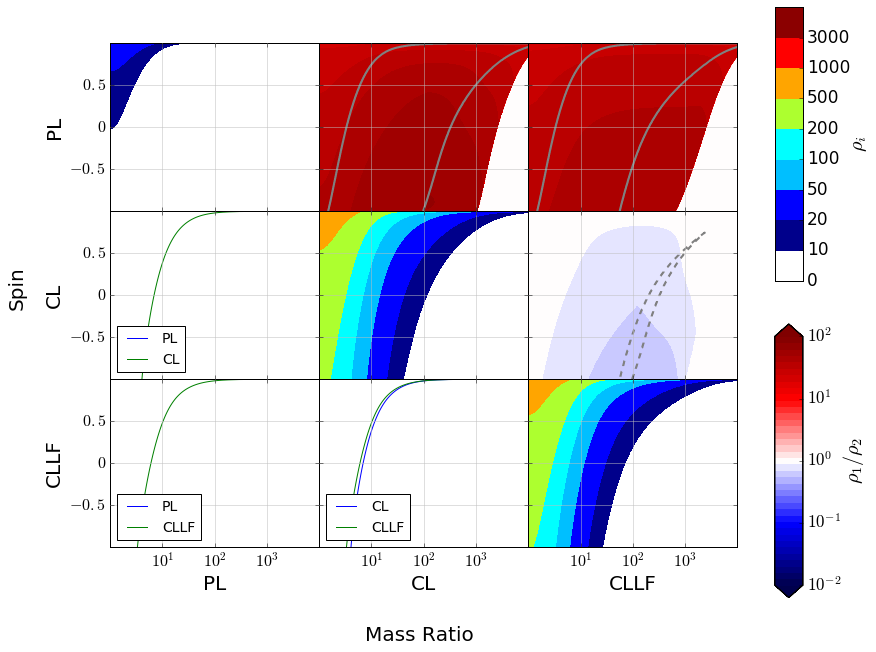

In [49]:
fig, ax = plot_main(figure_9_dict, return_fig_ax=True)
for i in [6,7,8]:
    ax[i].set_xticklabels([r'$10^{%i}$'%j for j in np.arange(1,4)])
fig.savefig("gridded_sense_curves.pdf", dpi=250)

## Figure 10

In [74]:
figure_10_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "show_figure": False,

    "save_figure": False,
    "output_path": "parameter_walk_through.pdf",

    "x_column_label": "q",
    "y_column_label": "s", 

    "figure_width": 13.0,
    "figure_height": 10.0,
    "spacing": "tight",
    "adjust_figure_bottom": 0.15,
    "fig_y_label": "Spin",
    "fig_x_label": r"Mass Ratio",
        
    "tick_label_fontsize":16,

    "num_rows": 3,
    "num_cols": 3,

    "xlims": [-4.0, 0.0],
    "dx": 1.0,
    "xscale": "log",
    "reverse_x_axis":True,

    "ylims": [-1.0, 1.0],
    "dy": 0.5,
    "yscale": "lin",
    "colobars":
        {"Ratio":{"label":r'$\rho_1/\rho_2$'}}
    },



"plot_info":
    {
    #set diagonals
    "0":{
        "file":[
            {"name":"M6_z5.hdf5",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 1},
        "type": "Ratio",
        "label":
            {"ylabel": r"$z=5$"}
        },
    "1":{
        "file":[
            {"name":"M7_z5.hdf5",
             "label":"LISA_prop_curve_all"}
            ],
        "type": "Waterfall",
        },
    "2":{
        "file":[
            {"name":"M8_z5.hdf5",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 1},
        "type": "Ratio",
        },
    "3":{
        "file":[
            {"name":"M6_z1.hdf5",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 4},
        "type": "Ratio",
        "label":
            {"ylabel": r"$z=1$"}
        },
    "4":{
        "file":[
            {"name":"M7_z1.hdf5",
             "label":"LISA_prop_curve_all"}
            ],
        "type": "Waterfall",
        },
    "5":{
        "file":[
            {"name":"M8_z1.hdf5",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 4},
        "type": "Ratio",
        },
    "6":{
        "file":[
            {"name":"M6_z05.hdf5",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 7},
        "type": "Ratio",
         "label":
            {"ylabel": r"$z=0.5$", "xlabel":r"$M=10^6M_\odot$"}
        },
    "7":{
        "file":[
            {"name":"M7_z05.hdf5",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 4},
        "type": "Waterfall",
        "label":
            {"xlabel": r"$M=10^7M_\odot$"}
        },
    "8":{
        "file":[
            {"name":"M8_z05.hdf5",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 7},
        "type": "Ratio",
        "label":
            {"xlabel": r"$M=10^8M_\odot$"}
        } 
    }
}


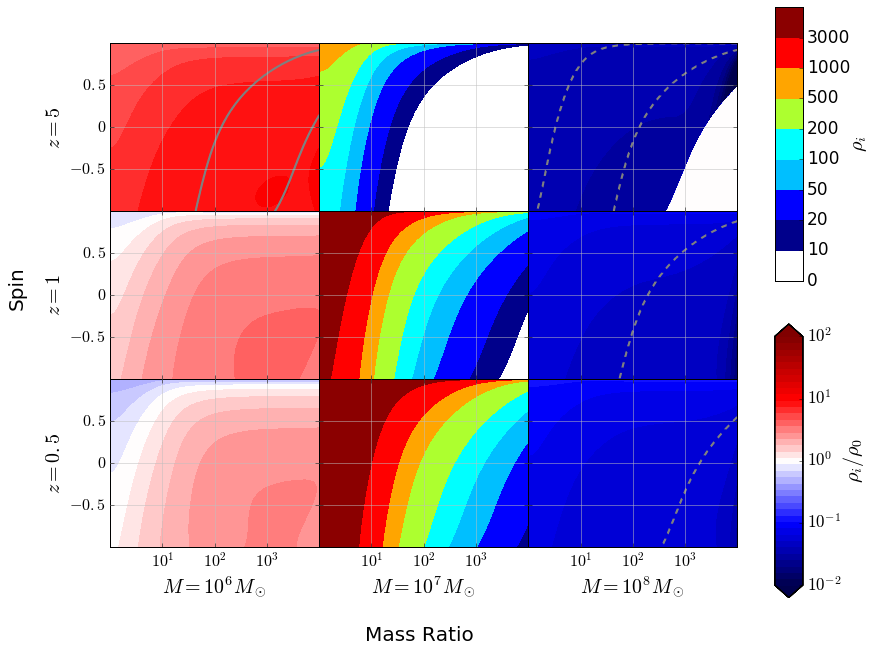

In [75]:
fig, ax = plot_main(figure_10_dict, return_fig_ax=True)
for i in [6,7,8]:
    ax[i].set_xticklabels([r'$10^{%i}$'%j for j in np.arange(1,4)])
fig.savefig("paper_data/parameter_walk_through.pdf", dpi=250)